# week 1 KNN近邻法

## task1 K-近邻法的原理与优缺点

**原理：** 采用测量不同特征值之间的距离方法进行分类。
* 优点：精度高、对异常值不敏感、无数据输入假定
* 缺点：计算复杂度高、空间复杂度高
* 适用数据范围： 数值型和标称型

**k-近邻算法步骤如下：**

* 计算已知类别数据集中的点与当前点之间的距离；
* 按照距离递增次序排序；
* 选取与当前点距离最小的k个点；
* 确定前k个点所在类别的出现频率；
* 返回前k个点所出现频率最高的类别作为当前点的预测分类。


In [2]:
import numpy as np
import operator #Python内部操作符对应的函数。这些函数主要分为几类：对象比较、逻辑比较、算术运算和序列操作。

### 数据生成函数

In [3]:
def createDataset():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0,0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [4]:
group, labels = createDataset()


### KNN近邻算法

In [5]:
def classify(inX, dataSet, labels, k):
    
    #inX 输入向量
    #dataSet训练样本集
    #labels标签向量
    #参数k用于选择近邻的数目
    
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #对输入向量在(相应位置进行重复)行方向上重复dataSetSize次， 将其与训练集向量相减
    sqDiffMat =diffMat**2;
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    #出argsort函数返回的是数组值从小到大的索引值
    
    classCount = {}
    
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        if voteIlabel not in classCount:
            classCount[voteIlabel] = 1
        else:
            classCount[voteIlabel] = classCount[voteIlabel] + 1
        
        sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
        # cmp：用于比较的函数，比较什么由key决定;
        # key：用列表元素的某个属性或函数进行作为关键字，有默认值，迭代集合中的一项;
        # reverse：排序规则. reverse = True  降序 或者 reverse = False 升序，有默认值。
        #定义函数key， 设定关键域为第1个域，根据第一个域进行排序
        return sortedClassCount[0][0]
        

### 测试KNN

In [6]:
group=np.array([[1. , 1.1],
       [1. , 1. ],
       [0. , 1 ],
       [0. , 0.1]])

In [7]:
labels =['A', 'C', 'B', 'D']

In [8]:
classify([0,0], group, labels, 3)

'D'

## task2 KNN网站配对效果

### 文本文件输入

In [9]:
import numpy as np

def file2matrix(filename):
    with open(filename) as fr:
        arrayOLines = fr.readlines()
        
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines, 3))
    #创建一个符合数据大小的零矩阵
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        #strip当参数为空值，默认删除空白符包括\n\r\t
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        #将每行数据的前三个提取出来
        
        #根据文本中的标记进行分类
        if listFromLine[-1]  == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
        
    return returnMat, classLabelVector

In [10]:
filename = 'datingTestSet.txt'
Mat, Vector = file2matrix(filename)

### 数据可视化

In [11]:
import matplotlib
import matplotlib.pyplot as plt

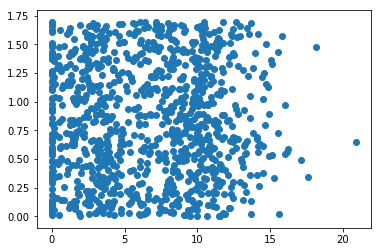

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
#将画布分割成1行1列，图像画在从左到右从上到下的第1块
ax.scatter(Mat[:, 1], Mat[:, 2])
plt.show()

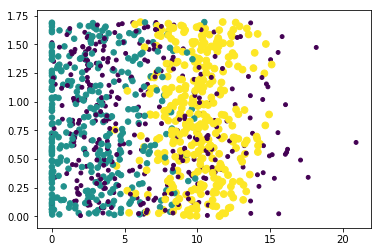

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
#将画布分割成1行1列，图像画在从左到右从上到下的第1块
ax.scatter(Mat[:, 1], Mat[:, 2], 15.0*np.array(Vector), 15.0*np.array(Vector))
#利用标签向量属性绘制色彩不同的散点图
plt.show()

![scatter参数设置](image/20151104231449817.jpg)

### 具体散点图分析

In [14]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np


def showdatas(datingDataMat, datingLabels):
    #设定汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #当fig画布分割成1行一列，不共享x轴和y轴，fig画布的大小为（13，8）
    #fig, ax = plt.subplots(2,2),其中参数分别代表子图的行数和列数，一共有 2x2 个图像。函数返回一个figure图像和一个子图ax的array列表。
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex = False, sharey = False, figsize = (13, 8))
    
    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i ==3:
            LabelsColors.append('red')
        
    #画出散点图，以Mat矩阵的第一第二列数据绘图，散点大小为15， 透明度0.5
    axs[0][0].scatter(x = datingDataMat[:, 0], y = datingDataMat[:, 1], color = LabelsColors, s=15, alpha = 0.5)
    axs0_title_text = axs[0][0].set_title(u'每年获得飞行常客里程数与玩视频游戏所消耗的时间占比', FontProperties = font)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数', FontProperties = font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩游戏时间所消耗时间占比', FontProperties = font)
    plt.setp(axs0_title_text, size = 9, weight = 'bold', color = 'red')
    plt.setp(axs0_xlabel_text, size =7, weight = 'bold', color = 'black')
    plt.setp(axs0_ylabel_text, size = 7, weight = 'bold', color = 'black')
    
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    
    #设置图例
    didntLike = mlines.Line2D([], [], color = 'black', marker = '.', markersize = 6, label = 'didntLike')
    smallDoses = mlines.Line2D([], [], color= 'orange' ,marker='.', markersize= 6, label = 'smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.', markersize= 6, label = 'largeDoses')
    
    #把图例添加上去
    axs[0][0].legend(handles = [didntLike, smallDoses, largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])  
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    
    plt.show()

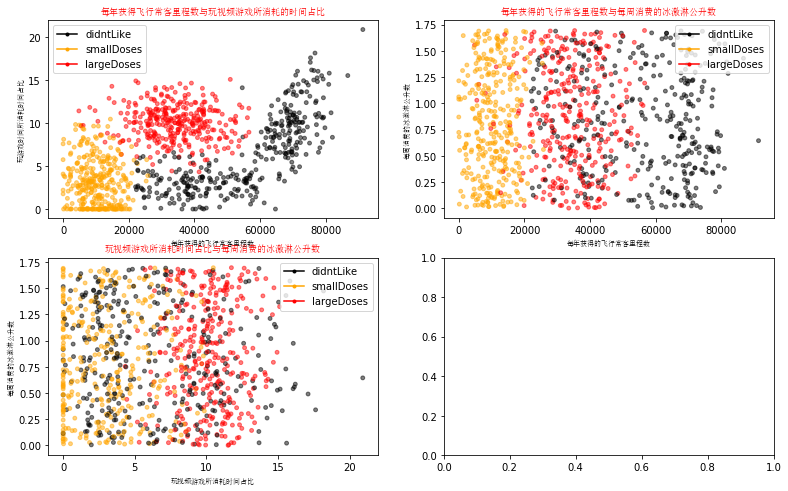

In [15]:
showdatas(Mat, Vector)

### 归一化数据

目的在于将各项因素等权重
newValue = (oldValue - min) / (max - min)

**axis** 理解可以作为方向理解，axis=0，表示方向向下，与行垂直

** 关于list列表、 元组tuple、数组array **

In [16]:
import numpy as np

def autoNorm(dataSet):
    minVals = dataSet.min(axis = 0)
    maxVals = dataSet.max(axis = 0)
    #axis=0表示行。将每一列数字求最值得到一行
    
    ranges = maxVals - minVals
    
    normDataSet = np.zeros(dataSet.shape)
    #python 语法问题
    
    m = dataSet.shape[0]
    normDataSet = dataSet - minVals
    normDataSet = normDataSet/ranges
    
    return normDataSet, ranges, minVals

In [17]:
filename = "datingTestSet.txt"
    #打开并处理数据
datingDataMat, datingLabels = file2matrix(filename)
normDataSet, ranges, minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


### 两个细节性问题

In [18]:
Mat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [19]:
Mat[0, :] = [1,2,4]
Mat

array([[1.0000000e+00, 2.0000000e+00, 4.0000000e+00],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [20]:
Mat[0 :] = [3,4,5]
Mat

array([[3., 4., 5.],
       [3., 4., 5.],
       [3., 4., 5.],
       ...,
       [3., 4., 5.],
       [3., 4., 5.],
       [3., 4., 5.]])

** 在进行数组中的某一行重置时，如果需要将单独一行重置加入Mat[0,:]**

In [21]:
np.shape(datingDataMat) == datingDataMat.shape

True

In [22]:
Mat.shape

(1000, 3)

In [23]:
type(datingDataMat.shape)

tuple

Mat.shape 生成tuple元祖 只能用[]方法调用

### 分类器针对约会网站的测试代码

In [24]:
def datingClassTest():
    #设定样本验证机切分比例
    hoRation = 0.1; #验证集，训练集1-hoRation
    #加载数据
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    #归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    
    m = normMat.shape[0]
    numTestVecs = int(m*hoRation)
    print("测试样本的数量" + str(numTestVecs))
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("分类的结果是" + str(classifierResult) + "真实结果为" + str(datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1
    print("the total error rate is :" + str(errorCount/float(numTestVecs)))
    print(errorCount)    

In [25]:
datingClassTest()

测试样本的数量100
分类的结果是3真实结果为3
分类的结果是2真实结果为2
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是3真实结果为3
分类的结果是3真实结果为3
分类的结果是1真实结果为1
分类的结果是3真实结果为3
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是2真实结果为2
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是2真实结果为2
分类的结果是3真实结果为3
分类的结果是2真实结果为2
分类的结果是1真实结果为1
分类的结果是3真实结果为2
分类的结果是3真实结果为3
分类的结果是2真实结果为2
分类的结果是3真实结果为3
分类的结果是2真实结果为2
分类的结果是3真实结果为3
分类的结果是2真实结果为2
分类的结果是1真实结果为1
分类的结果是3真实结果为3
分类的结果是1真实结果为1
分类的结果是3真实结果为3
分类的结果是1真实结果为1
分类的结果是3真实结果为2
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是2真实结果为2
分类的结果是3真实结果为3
分类的结果是3真实结果为3
分类的结果是1真实结果为1
分类的结果是2真实结果为2
分类的结果是3真实结果为3
分类的结果是3真实结果为3
分类的结果是3真实结果为3
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是1真实结果为1
分类的结果是3真实结果为1
分类的结果是2真实结果为2
分类的结果是2真实结果为2
分类的结果是1真实结果为1
分类的结果是3真实结果为3
分类的结果是2真实结果为2
分类的结果是2真实结果为2
分类的结果是2真实结果为2
分类的结果是2真实结果为2
分类的结果是3真实结果为3
分类的结果是1真实结果为1
分类的结果是2真实结果为2
分类的结果是1真实结果为1
分类的结果是2真实结果为2
分类的结果是2真实结果为2
分类的结果是3真实结果为2
分类的结果是2真实结果为2
分类的结果是2真实结果为2
分类的结果是3真实结果为3
分类的结果是2真实结果为2
分类的结果是3真实结果为3
分类的结果是1真实结果为1
分类的结果是2真实

### 构建完成预测系统

In [26]:
def classifyPerson():
    #输出结果
    result = ["讨厌", "有些喜欢", "非常喜欢"]
    #三维用户特征输入
    ffMiles = float(input("每年获得的飞行常客里程数"))
    iceCream = float(input("每周消费的冰淇淋公升数"))
    precentTats = float(input("玩游戏时间所耗费时间百分比"))
    
    filename =  "datingTestSet.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles,  iceCream, precentTats])
    norminArr = (inArr - minVals) / ranges
    #在进行训练样本归一化时返回最小值minVals和范围ranges用于在测试是同调
    classifierResult = classify(norminArr, normMat, datingLabels, 3)
    print("你可能%s这个人" %(result[classifierResult-1]))
    

In [32]:
classifyPerson()

每年获得的飞行常客里程数36000
每周消费的冰淇淋公升数3
玩游戏时间所耗费时间百分比0.2
你可能讨厌这个人


## task 3 sklearn手写数字识别

** 导入模块，应用模块进行机器学习 ** 

Scikit learn 也简称sklearn，是机器学习领域当中最知名的python模块之一。sklearn包含了很多机器学习的方式：


* Classification 分类
* Regression 回归
* Clustering 非监督分类
* Dimensionality reduction 数据降维
* Model Selection 模型选择
* Preprocessing 数据与处理


In [28]:
import numpy as np
import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as KNN

### 文件导入转化

In [60]:
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    with open(filename) as fr:
        for i in range(32):
            lineStr = fr.readline()
            for j in range(32):
                returnVect[0, 32*i+j] = int(lineStr[j])
        return returnVect

### 手写数字分类测试

In [108]:
def handwritingClassTest():
    #测试集的label
    hwLabels = []
    #返回trainDights目录下的文件名
    trainingFileList = listdir("trainingDigits")
    m = len(trainingFileList) 
    trainingMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        #取出样本文件名中代表标签的数字
        classNumber = int(fileNameStr.split('_')[0])
        hwLabels.append(classNumber)
        trainingMat[i, :] = img2vector("trainingDigits/" + str(fileNameStr))
        
    #构建KNN分类器
    neigh = KNN(n_neighbors=3, algorithm= "auto")
    #sklearn 的KNN分类器参数，此种n_neighboe代表选取最近点的数量，algorithm代表近邻搜索算法 ，默认为auto
    #拟合模型 ，输入训练集样本和标签
    neigh.fit(trainingMat, hwLabels)
    
    #开始测试集部分
    testFileList = listdir("testDigits")
    errorCount = 0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        classNumber = int(fileNameStr.split('_')[0])
        vectorUnderTest = img2vector("testDigits/" + str(fileNameStr))
        
        classifierResult = neigh.predict(vectorUnderTest)
        print("分类结果" + str(classifierResult) + "真实结果" + str(classNumber))
        if classifierResult != classNumber:
            errorCount += 1
    print("总共错误%d个数据，错误率为%f" %(errorCount, errorCount/mTest *100))

In [109]:
handwritingClassTest()

分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0
分类结果[0]真实结果0

分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[6]真实结果6
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7
分类结果[7]真实结果7

## 总结

**优点：**

* 简单好用，容易理解，精度高，理论成熟，既可以用来做分类也可以用来做回归；
* 可用于数值型数据和离散型数据；
* 训练时间复杂度为O(n)；无数据输入假定；
* 对异常值不敏感。

**缺点：**


* 计算复杂性高；空间复杂性高；
* 样本不平衡问题（即有些类别的样本数量很多，而其它样本的数量很少）；
* 一般数值很大的时候不用这个，计算量太大。但是单个样本又不能太少，否则容易发生误分。
* 最大的缺点是无法给出数据的内在含义。


** 备注： ** 

* 关于algorithm参数kd_tree的原理，可以查看《统计学方法 李航》书中的讲解；
* 关于距离度量的方法还有切比雪夫距离、马氏距离、巴氏距离等；
        余弦距离 ： 余弦相似度更加注重两个向量在方向上的差异，而非距离或长度

**欧氏距离和余弦距离的区别：**

余弦距离使用两个向量夹角的余弦值作为衡量两个个体间差异的大小。相比欧氏距离，余弦距离更加注重两个向量在方向上的差异。

    欧氏距离衡量的是空间各点的绝对距离，跟各个点所在的位置坐标直接相关；而余弦距离衡量的是空间向量的夹角，更加体现在方向上的差异，而不是位置。如果保持A点位置不变，B点朝原方向远离坐标轴原点，那么这个时候余弦距离  是保持不变的（因为夹角没有发生变化），而A、B两点的距离显然在发生改变，这就是欧氏距离和余弦距离之间的不同之处。

    欧氏距离和余弦距离各自有不同的计算方式和衡量特征，因此它们适用于不同的数据分析模型：

    欧氏距离能够体现个体数值特征的绝对差异，所以更多的用于需要从维度的数值大小中体现差异的分析，如使用用户行为指标分析用户价值的相似度或差异。

    余弦距离更多的是从方向上区分差异，而对绝对的数值不敏感，更多的用于使用用户对内容评分来区分兴趣的相似度和差异，同时修正了用户间可能存在的度量标准不统一的问题（因为余弦距离对绝对数值不敏感）。
 

维数灾难 https://zhuanlan.zhihu.com/p/27488363 
过拟合是维度灾难带来的最直接结果，简单的分类器对于未知的数据具有更好的泛化性能

** 零样本识别问题 ** 由于维度灾难的影响，正如前面所说的在高维空间中，欧式距离的测度会失去意义，当维度趋于无穷时，数据集中任意两点的距离会趋向收敛，意思是任意两点的最大距离和最小距离会变为相同。
因此基于欧式距离的k-means算法，会无法进行聚类（因为距离会趋于收敛）。而K-NN会的临近K个点中，会出现更多非同类的点（远多于低维度的情况）。
